In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from textwrap import wrap
from textblob import TextBlob
import textstat
from nltk.corpus import stopwords

In [2]:
# Load CSV file into DataFrame
df = pd.read_csv('output-merged.csv', encoding="latin1")
df.tail()

,Title,Content,Number of Words,Keywords,Date Published,Link
1068,K-pop star J-Hope embarks on military training...,BTS star J-Hope started his military service ...,245,entertainment-arts,2023-04-18T09:09:45.000Z,https://www.bbc.com/news/entertainment-arts-65...
1069,Apple in Mumbai: Tim Cook inaugurates first st...,Apple Chief Executive Tim Cook has launched t...,443,world-asia,2023-04-18T08:31:25.000Z,https://www.bbc.com/news/world-asia-india-6530...
1070,Apple CEO Tim Cook opens doors of first India ...,,443,world-asia,2023-04-18T08:31:25.000Z,https://www.bbc.com/news/world-asia-india-6530...
1071,Covid: China economy rebounds after pandemic m...,China's economy grew faster than expected in ...,384,business-65307471,2023-04-18T05:47:47.000Z,https://www.bbc.com/news/business-65307471
1072,Hikvision: Chinese surveillance tech giant den...,Chinese surveillance technology giant Hikvisi...,533,world-asia,2023-04-18T05:04:19.000Z,https://www.bbc.com/news/world-asia-china-6530...


In [3]:
df.columns
df = df.fillna("NaN")
df.tail()

,Title,Content,Number of Words,Keywords,Date Published,Link
1068,K-pop star J-Hope embarks on military training...,BTS star J-Hope started his military service ...,245,entertainment-arts,2023-04-18T09:09:45.000Z,https://www.bbc.com/news/entertainment-arts-65...
1069,Apple in Mumbai: Tim Cook inaugurates first st...,Apple Chief Executive Tim Cook has launched t...,443,world-asia,2023-04-18T08:31:25.000Z,https://www.bbc.com/news/world-asia-india-6530...
1070,Apple CEO Tim Cook opens doors of first India ...,,443,world-asia,2023-04-18T08:31:25.000Z,https://www.bbc.com/news/world-asia-india-6530...
1071,Covid: China economy rebounds after pandemic m...,China's economy grew faster than expected in ...,384,business-65307471,2023-04-18T05:47:47.000Z,https://www.bbc.com/news/business-65307471
1072,Hikvision: Chinese surveillance tech giant den...,Chinese surveillance technology giant Hikvisi...,533,world-asia,2023-04-18T05:04:19.000Z,https://www.bbc.com/news/world-asia-china-6530...


In [4]:
df.shape
text = df[['Title', 'Content', 'Number of Words', 'Keywords']]
text.tail()

,Title,Content,Number of Words,Keywords
1068,K-pop star J-Hope embarks on military training...,BTS star J-Hope started his military service ...,245,entertainment-arts
1069,Apple in Mumbai: Tim Cook inaugurates first st...,Apple Chief Executive Tim Cook has launched t...,443,world-asia
1070,Apple CEO Tim Cook opens doors of first India ...,,443,world-asia
1071,Covid: China economy rebounds after pandemic m...,China's economy grew faster than expected in ...,384,business-65307471
1072,Hikvision: Chinese surveillance tech giant den...,Chinese surveillance technology giant Hikvisi...,533,world-asia


In [5]:
text1 = df[['Title', 'Content', 'Number of Words']]
text1.tail(20)

,Title,Content,Number of Words
1053,Chinese actress Jiang Mengjie praised for reve...,Chinese actress Jiang Mengjie has been praise...,458
1054,India to have more people than China by mid-20...,India is set to overtake China to become the ...,486
1055,People cling to aircon units on side of burnin...,,486
1056,Beijing: Twelve held after Beijing hospital fi...,Twelve people have been detained by police fo...,440
1057,Supreme Court: Historic India same sex marriag...,The Indian Supreme Court's hearing into a num...,1293
1058,Harmanpreet Kaur: India rejoices as Indian cap...,Indians are celebrating after Harmanpreet Kau...,340
1059,Heatwave: Is India ready to deal with extreme ...,"In his best-selling 2020 novel, The Ministry ...",1063
1060,Pakistan: Lorries crushed and buried in deadly...,,1063
1061,Noel Hanna: NI climber lived for the mountains...,"Mountaineer Noel Hanna, who has died during a...",592
1062,Cyclone Ilsa: Stranded Indonesian fishermen re...,Eleven Indonesian fishermen have been rescued...,241


## Replace empty "Content" with corresponding "Title"

In [6]:
import numpy as np
text1['Content'] = text1['Content'].replace(' ', np.nan)
text1['Content'].fillna(text1['Title'], inplace=True)
text1.tail()

C:\Users\Yamini Manral\AppData\Local\Temp\ipykernel_4536\1279088670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text1['Content'] = text1['Content'].replace(' ', np.nan)
C:\Users\Yamini Manral\AppData\Local\Temp\ipykernel_4536\1279088670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text1['Content'].fillna(text1['Title'], inplace=True)


,Title,Content,Number of Words
1068,K-pop star J-Hope embarks on military training...,BTS star J-Hope started his military service ...,245
1069,Apple in Mumbai: Tim Cook inaugurates first st...,Apple Chief Executive Tim Cook has launched t...,443
1070,Apple CEO Tim Cook opens doors of first India ...,Apple CEO Tim Cook opens doors of first India ...,443
1071,Covid: China economy rebounds after pandemic m...,China's economy grew faster than expected in ...,384
1072,Hikvision: Chinese surveillance tech giant den...,Chinese surveillance technology giant Hikvisi...,533


## Word count for the "Content" column

In [7]:
def count_words(cell):
    words = cell.split()
    return len(words)

# Apply the count_words function to the 'Content' column using apply() and lambda
text1['Word Count(new)'] = text1['Content'].apply(lambda x: count_words(x))
text1.tail(20)

C:\Users\Yamini Manral\AppData\Local\Temp\ipykernel_4536\3899661068.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text1['Word Count(new)'] = text1['Content'].apply(lambda x: count_words(x))


,Title,Content,Number of Words,Word Count(new)
1053,Chinese actress Jiang Mengjie praised for reve...,Chinese actress Jiang Mengjie has been praise...,458,450
1054,India to have more people than China by mid-20...,India is set to overtake China to become the ...,486,485
1055,People cling to aircon units on side of burnin...,People cling to aircon units on side of burnin...,486,10
1056,Beijing: Twelve held after Beijing hospital fi...,Twelve people have been detained by police fo...,440,440
1057,Supreme Court: Historic India same sex marriag...,The Indian Supreme Court's hearing into a num...,1293,1293
1058,Harmanpreet Kaur: India rejoices as Indian cap...,Indians are celebrating after Harmanpreet Kau...,340,340
1059,Heatwave: Is India ready to deal with extreme ...,"In his best-selling 2020 novel, The Ministry ...",1063,1059
1060,Pakistan: Lorries crushed and buried in deadly...,Pakistan: Lorries crushed and buried in deadly...,1063,8
1061,Noel Hanna: NI climber lived for the mountains...,"Mountaineer Noel Hanna, who has died during a...",592,589
1062,Cyclone Ilsa: Stranded Indonesian fishermen re...,Eleven Indonesian fishermen have been rescued...,241,241


## Data Preprocessing
ref: https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

There is no missing data, therefore, we can move to the next stage. For Term frequency analysis, it is essential that the text data be preprocessed.

* Lowercase
* Remove punctutations
* Stopword removal

In [8]:
def clean_title(content):
    
    content = content.lower()
    content = re.sub('[^a-z A-Z 0-9-]+', ' ', content)
    
    return content

In [9]:
text1['Content'] = text1['Content'].apply(clean_title)
text1['Title'] = text1['Title'].apply(clean_title)
text1.head()

C:\Users\Yamini Manral\AppData\Local\Temp\ipykernel_4536\162170208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text1['Content'] = text1['Content'].apply(clean_title)
C:\Users\Yamini Manral\AppData\Local\Temp\ipykernel_4536\162170208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text1['Title'] = text1['Title'].apply(clean_title)


,Title,Content,Number of Words,Word Count(new)
0,blackstone is the latest victim of the ...,the ongoing commercial real estate slowdown ha...,395,343
1,the 787 5 million settlement fox agree...,the 787 5 million settlement that fox news ha...,559,516
2,markets are starting to get worried abo...,you d hardly know by looking at financial mark...,476,419
3,tesla shares plunge on lower prices ti...,tesla has cut the prices of its evs repeatedly...,510,420
4,former theranos coo ramesh sunny,ramesh sunny balwani the former chief opera...,420,347


In [10]:
text1['Content'][2]

'you d hardly know by looking at financial markets that the us debt limit was breached in january  but that s starting to change  in what is shaping up to be a nail-biting game of debt ceiling squabbling as the shot clock is winding down  if lawmakers don t raise the nation s borrowing limit by june  the federal government runs the risk of defaulting on its debt obligations  treasury secretary janet yellen said in january  that would be catastrophic for the economy and put millions of jobs in jeopardy  moody s chief economist said  markets aren t shrugging that off  investors are demanding historically high yields for us treasury notes that mature in july  which by some estimates is when the united states will default on its debt  absent any legislative action  that would mean bondholders aren t repaid the money they gher interest rates to compensate investors for locking down their money for a greater period of time  there s also more uncertainty around the path that interest rates wi

In [11]:
text1['Word Count(new)'] = text1['Content'].apply(lambda x: count_words(x))
text1.tail()

C:\Users\Yamini Manral\AppData\Local\Temp\ipykernel_4536\1631643890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text1['Word Count(new)'] = text1['Content'].apply(lambda x: count_words(x))


,Title,Content,Number of Words,Word Count(new)
1068,k-pop star j-hope embarks on military training...,bts star j-hope started his military service ...,245,247
1069,apple in mumbai tim cook inaugurates first st...,apple chief executive tim cook has launched t...,443,452
1070,apple ceo tim cook opens doors of first india ...,apple ceo tim cook opens doors of first india ...,443,12
1071,covid china economy rebounds after pandemic m...,china s economy grew faster than expected in ...,384,396
1072,hikvision chinese surveillance tech giant den...,chinese surveillance technology giant hikvisi...,533,537


In [12]:
def corpus(text):
    text_list = text.split()
    return text_list

text1['Content_list'] = text1['Content'].apply(corpus)
text1

C:\Users\Yamini Manral\AppData\Local\Temp\ipykernel_4536\2097849003.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text1['Content_list'] = text1['Content'].apply(corpus)


,Title,Content,Number of Words,Word Count(new),Content_list
0,blackstone is the latest victim of the ...,the ongoing commercial real estate slowdown ha...,395,352,"[the, ongoing, commercial, real, estate, slowd..."
1,the 787 5 million settlement fox agree...,the 787 5 million settlement that fox news ha...,559,519,"[the, 787, 5, million, settlement, that, fox, ..."
2,markets are starting to get worried abo...,you d hardly know by looking at financial mark...,476,432,"[you, d, hardly, know, by, looking, at, financ..."
3,tesla shares plunge on lower prices ti...,tesla has cut the prices of its evs repeatedly...,510,430,"[tesla, has, cut, the, prices, of, its, evs, r..."
4,former theranos coo ramesh sunny,ramesh sunny balwani the former chief opera...,420,353,"[ramesh, sunny, balwani, the, former, chief, o..."
...,...,...,...,...,...
1068,k-pop star j-hope embarks on military training...,bts star j-hope started his military service ...,245,247,"[bts, star, j-hope, started, his, military, se..."
1069,apple in mumbai tim cook inaugurates first st...,apple chief executive tim cook has launched t...,443,452,"[apple, chief, executive, tim, cook, has, laun..."
1070,apple ceo tim cook opens doors of first india ...,apple ceo tim cook opens doors of first india ...,443,12,"[apple, ceo, tim, cook, opens, doors, of, firs..."
1071,covid china economy rebounds after pandemic m...,china s economy grew faster than expected in ...,384,396,"[china, s, economy, grew, faster, than, expect..."


## Word frequency 

Word frequencies are

In [13]:
from collections import Counter
from tqdm import trange

corpus = []
for i in trange(text1.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += text1['Content_list'][i]
len(corpus)

mostCommon = Counter(corpus).most_common(15)
mostCommon

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1073/1073 [00:00<00:00, 24866.64it/s]


[('the', 43517),
 ('to', 20459),
 ('of', 18599),
 ('and', 17671),
 ('a', 16212),
 ('in', 15382),
 ('that', 8506),
 ('s', 7737),
 ('for', 6611),
 ('on', 6165),
 ('is', 6151),
 ('it', 5566),
 ('said', 4714),
 ('with', 4487),
 ('as', 4464)]

In [14]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

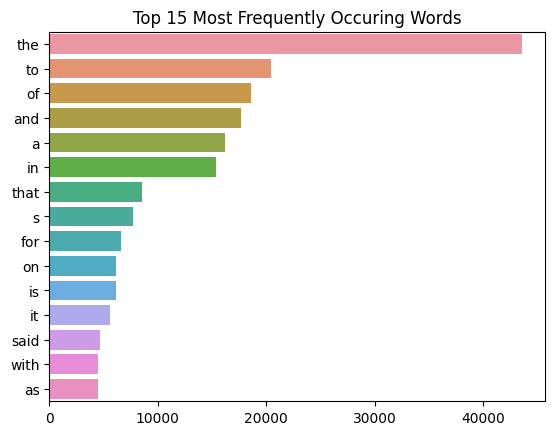

In [15]:
import seaborn as sns
sns.barplot(x=freq, y=words)
plt.title('Top 15 Most Frequently Occuring Words')
plt.show()

> A stat that shows most news is "he said, she said"! XD

## Most Frequently occuring N_grams
What is an N-gram?
An n-gram is sequence of n words in a text. Most words by themselves may not present the entire context. Typically adverbs such as 'most' or 'very' are used to modify verbs and adjectives. Therefore, n-grams help analyse phrases and not just words which can lead to better insights.

A Bi-gram means two words in a sequence. 'Very good' or 'Too great'
A Tri-gram means three words in a sequence. 'How was your day' would be broken down to 'How was your' and 'was your day'.

For separating text into n-grams, we will use *CountVectorizer* from Sklearn

In [16]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(text1['Content'])

In [17]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "bi-gram"]

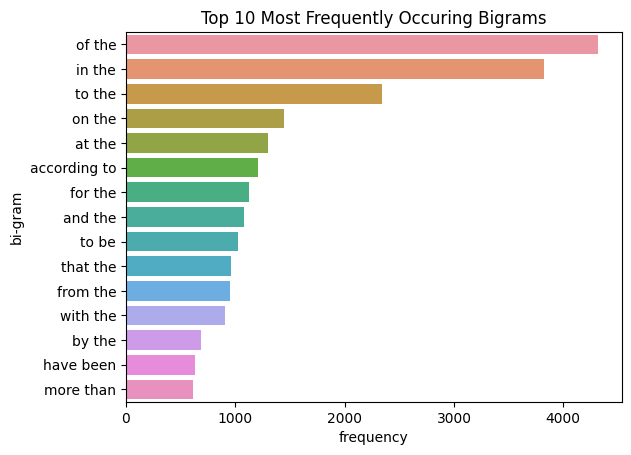

In [18]:
sns.barplot(x=ngram_freq['frequency'][:15], y=ngram_freq['bi-gram'][:15])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [19]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(text1['Content'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "Tri-gram"]

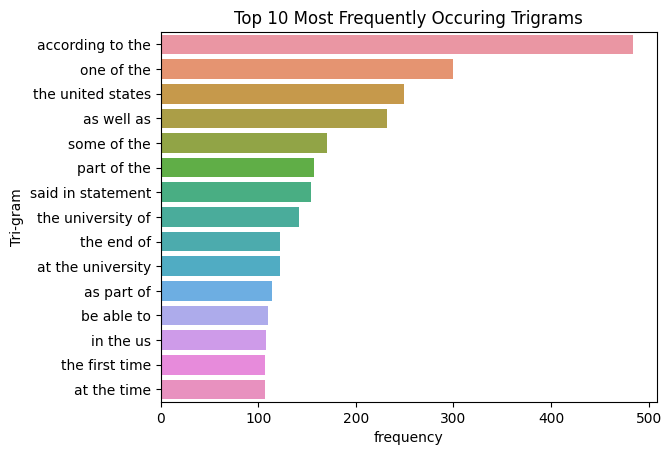

In [20]:
sns.barplot(x=ngram_freq['frequency'][:15], y=ngram_freq['Tri-gram'][:15])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

First, I’ll take a look at the number of characters present in each sentence. This can give us a rough idea about the news headline length.

<Axes: >

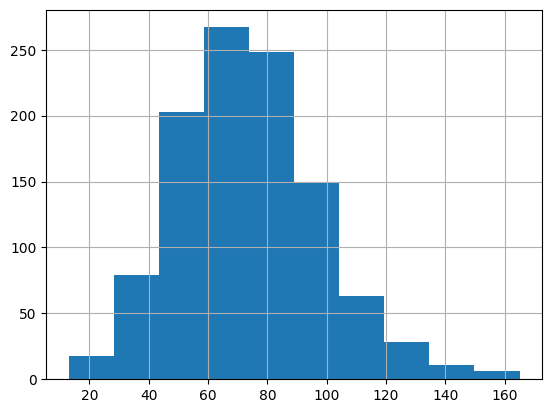

In [21]:
text1['Title'].str.len().hist()

Each headline has about 100 characters!

<Axes: >

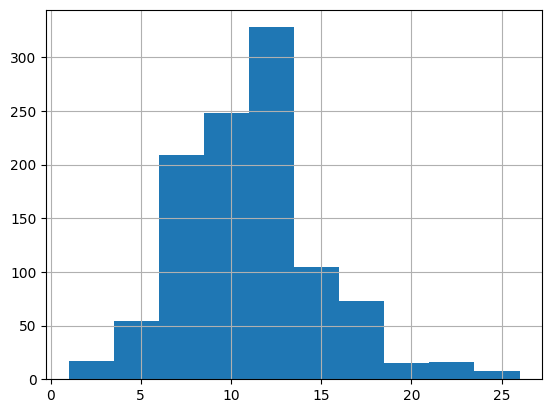

In [22]:
text1['Title'].str.split().map(lambda x: len(x)).hist()

Each headline has about 10 words!

## Sentiment Analysis using Textblob
Textblob is a python library built on top of nltk. It has been around for some time and is very easy and convenient to use.

The sentiment function of TextBlob returns two properties:

polarity: is a floating-point number that lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.

subjectivity: refers to how someone’s judgment is shaped by personal opinions and feelings. Subjectivity is represented as a floating-point value which lies in the range of [0,1].

I will run this function on our news headlines as well as content.

In [23]:
from textblob import TextBlob
TextBlob('100 people killed in Iraq').sentiment

Sentiment(polarity=-0.2, subjectivity=0.0)

<Axes: >

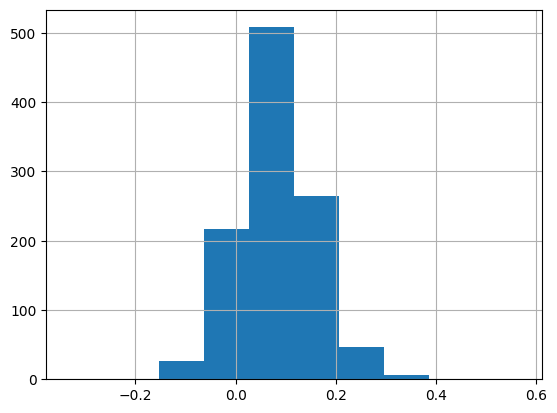

In [24]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

text1['content_polarity']=text1['Content'].apply(lambda x : polarity(x))
text1['content_polarity'].hist()


<Axes: >

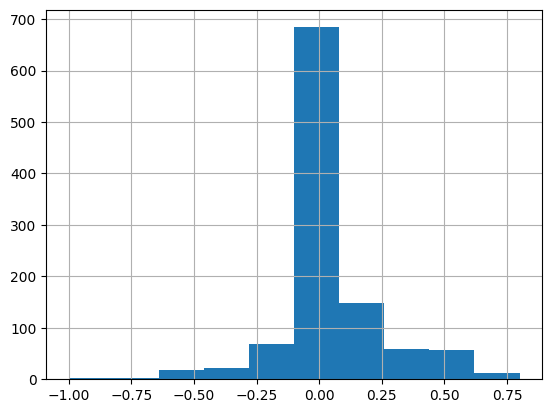

In [25]:
text1['title_polarity'] = text1['Title'].apply(lambda x : polarity(x))
text1['title_polarity'].hist()

<BarContainer object of 3 artists>

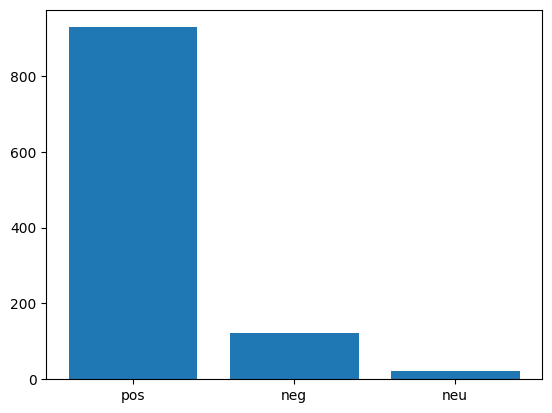

In [26]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'

text1['c_polarity']=text1['content_polarity'].map(lambda x: sentiment(x))

plt.bar(text1.c_polarity.value_counts().index,
        text1.c_polarity.value_counts())

A lot of news description/content is positive!

<BarContainer object of 3 artists>

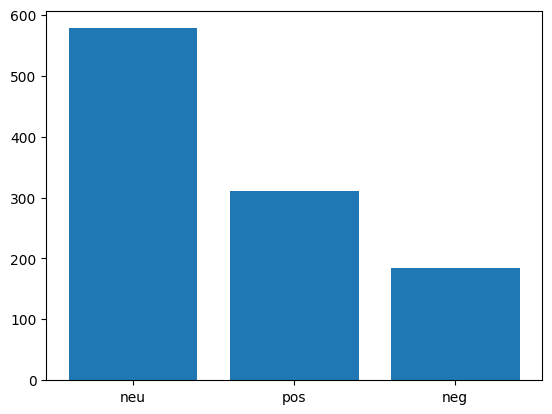

In [27]:
text1['t_polarity']=text1['title_polarity'].map(lambda x: sentiment(x))

plt.bar(text1.t_polarity.value_counts().index,
        text1.t_polarity.value_counts())

In [28]:
# text1 = text1.drop('polarity', axis=1)
text1

,Title,Content,Number of Words,Word Count(new),Content_list,content_polarity,title_polarity,c_polarity,t_polarity
0,blackstone is the latest victim of the ...,the ongoing commercial real estate slowdown ha...,395,352,"[the, ongoing, commercial, real, estate, slowd...",0.089365,0.156250,pos,pos
1,the 787 5 million settlement fox agree...,the 787 5 million settlement that fox news ha...,559,519,"[the, 787, 5, million, settlement, that, fox, ...",0.079806,-0.055556,pos,neg
2,markets are starting to get worried abo...,you d hardly know by looking at financial mark...,476,432,"[you, d, hardly, know, by, looking, at, financ...",0.059824,0.000000,pos,neu
3,tesla shares plunge on lower prices ti...,tesla has cut the prices of its evs repeatedly...,510,430,"[tesla, has, cut, the, prices, of, its, evs, r...",-0.069735,0.000000,neg,neu
4,former theranos coo ramesh sunny,ramesh sunny balwani the former chief opera...,420,353,"[ramesh, sunny, balwani, the, former, chief, o...",0.062667,0.000000,pos,neu
...,...,...,...,...,...,...,...,...,...
1068,k-pop star j-hope embarks on military training...,bts star j-hope started his military service ...,245,247,"[bts, star, j-hope, started, his, military, se...",0.008333,-0.100000,pos,neg
1069,apple in mumbai tim cook inaugurates first st...,apple chief executive tim cook has launched t...,443,452,"[apple, chief, executive, tim, cook, has, laun...",0.131723,0.250000,pos,pos
1070,apple ceo tim cook opens doors of first india ...,apple ceo tim cook opens doors of first india ...,443,12,"[apple, ceo, tim, cook, opens, doors, of, firs...",0.250000,0.250000,pos,pos
1071,covid china economy rebounds after pandemic m...,china s economy grew faster than expected in ...,384,396,"[china, s, economy, grew, faster, than, expect...",0.075791,0.000000,pos,neu


## Sentiment analysis using VADER (Valence Aware Dictionary for Sentiment Reasoning)

source: https://www.analyticsvidhya.com/blog/2022/10/sentiment-analysis-using-vader/#:~:text=VADER(%20Valence%20Aware%20Dictionary%20for,as%20either%20positive%20or%20negative.

In [29]:
import numpy as np
import pandas as pd
import nltk
#download vader from nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#creating an object of sentiment intensity analyzer
sia= SentimentIntensityAnalyzer()

text1_vader = text1[['Title', 'Content']]
text1_vader

[nltk_data] Downloading package vader_lexicon to C:\Users\Yamini
[nltk_data]     Manral\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Title,Content
0,blackstone is the latest victim of the ...,the ongoing commercial real estate slowdown ha...
1,the 787 5 million settlement fox agree...,the 787 5 million settlement that fox news ha...
2,markets are starting to get worried abo...,you d hardly know by looking at financial mark...
3,tesla shares plunge on lower prices ti...,tesla has cut the prices of its evs repeatedly...
4,former theranos coo ramesh sunny,ramesh sunny balwani the former chief opera...
...,...,...
1068,k-pop star j-hope embarks on military training...,bts star j-hope started his military service ...
1069,apple in mumbai tim cook inaugurates first st...,apple chief executive tim cook has launched t...
1070,apple ceo tim cook opens doors of first india ...,apple ceo tim cook opens doors of first india ...
1071,covid china economy rebounds after pandemic m...,china s economy grew faster than expected in ...


In [30]:
text= "Bobby is an amazing guy"
sia.polarity_scores(text)

{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.5859}

In [31]:
#creating new column scores using polarity scores function
text1_vader['scores']=text1_vader['Title'].apply(lambda body: sia.polarity_scores(str(body)))
text1_vader

C:\Users\Yamini Manral\AppData\Local\Temp\ipykernel_4536\947402310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text1_vader['scores']=text1_vader['Title'].apply(lambda body: sia.polarity_scores(str(body)))


,Title,Content,scores
0,blackstone is the latest victim of the ...,the ongoing commercial real estate slowdown ha...,"{'neg': 0.306, 'neu': 0.694, 'pos': 0.0, 'comp..."
1,the 787 5 million settlement fox agree...,the 787 5 million settlement that fox news ha...,"{'neg': 0.061, 'neu': 0.861, 'pos': 0.078, 'co..."
2,markets are starting to get worried abo...,you d hardly know by looking at financial mark...,"{'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compou..."
3,tesla shares plunge on lower prices ti...,tesla has cut the prices of its evs repeatedly...,"{'neg': 0.165, 'neu': 0.451, 'pos': 0.383, 'co..."
4,former theranos coo ramesh sunny,ramesh sunny balwani the former chief opera...,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp..."
...,...,...,...
1068,k-pop star j-hope embarks on military training...,bts star j-hope started his military service ...,"{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'comp..."
1069,apple in mumbai tim cook inaugurates first st...,apple chief executive tim cook has launched t...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1070,apple ceo tim cook opens doors of first india ...,apple ceo tim cook opens doors of first india ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1071,covid china economy rebounds after pandemic m...,china s economy grew faster than expected in ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [32]:
text1_vader['compound']=text1_vader['scores'].apply(lambda score_dict:score_dict['compound'])
text1_vader['positive']=text1_vader['scores'].apply(lambda pos_dict:pos_dict['pos'])
text1_vader['negative']=text1_vader['scores'].apply(lambda neg_dict:neg_dict['neg'])

# We then create a new column named type, which indicates whether the review is pos, neg, or neutral.

text1_vader['type']=''
text1_vader.loc[text1_vader.compound>0,'type']='POS'
text1_vader.loc[text1_vader.compound==0,'type']='NEUTRAL'
text1_vader.loc[text1_vader.compound<0,'type']='NEG'
text1_vader.head()

C:\Users\Yamini Manral\AppData\Local\Temp\ipykernel_4536\1030844233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text1_vader['compound']=text1_vader['scores'].apply(lambda score_dict:score_dict['compound'])
C:\Users\Yamini Manral\AppData\Local\Temp\ipykernel_4536\1030844233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text1_vader['positive']=text1_vader['scores'].apply(lambda pos_dict:pos_dict['pos'])
C:\Users\Yamini Manral\AppData\Local\Temp\ipykernel_4536\1030844233.py:3: SettingWithCopyWarn

,Title,Content,scores,compound,positive,negative,type
0,blackstone is the latest victim of the ...,the ongoing commercial real estate slowdown ha...,"{'neg': 0.306, 'neu': 0.694, 'pos': 0.0, 'comp...",-0.5267,0.000,0.306,NEG
1,the 787 5 million settlement fox agree...,the 787 5 million settlement that fox news ha...,"{'neg': 0.061, 'neu': 0.861, 'pos': 0.078, 'co...",0.0900,0.078,0.061,POS
2,markets are starting to get worried abo...,you d hardly know by looking at financial mark...,"{'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compou...",-0.5719,0.000,0.370,NEG
3,tesla shares plunge on lower prices ti...,tesla has cut the prices of its evs repeatedly...,"{'neg': 0.165, 'neu': 0.451, 'pos': 0.383, 'co...",0.4404,0.383,0.165,POS
4,former theranos coo ramesh sunny,ramesh sunny balwani the former chief opera...,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.4215,0.412,0.000,POS


In [33]:
length=text1_vader.shape
print(len)
(rows,cols)=length
pos=0
neg=0
neutral=0
for i in range(0,rows):
    if text1_vader.loc[i][6]=="POS":
        pos=pos+1
    if text1_vader.loc[i][6]=="NEG":
        neg=neg+1
    if text1_vader.loc[i][6]=="NEUTRAL":
        neutral=neutral+1
print("Positive :"+str(pos) + "  Negative :" + str(neg) + "   Neutral :"+ str(neutral))

<built-in function len>
Positive :266  Negative :358   Neutral :449


# Historical data

## Al jazeera english news from sept 2003 to dec 2003

In [34]:
import pandas as pd
import json
with open('data.json') as f:
    data = json.load(f)

# Convert JSON to DataFrame
data = pd.DataFrame.from_dict(data)
data[['title', 'content', 'news_post_date']]

,title,content,news_post_date
0,War crimes Serb commander pleads guilty,"In confessing his guilt on Thursday, Dragan Ni...",4 Sep 2003
1,Obesity suit against McDonald’s dismissed,US District Judge Robert Sweet on Thursday dis...,4 Sep 2003
2,Rumsfeld says Iraq is improving,Arriving on Thursday in Baghdad against a back...,4 Sep 2003
3,One killed in Beirut Shia rivalry,Confusion reigned on Thursday over the dead ma...,4 Sep 2003
4,UN troops foiled by Congo weather,The failure on Thursday comes as a sign of dif...,4 Sep 2003
...,...,...,...
3416,"Kurdish expansion, anti demo called","Ismail Abbudi, the head of the local Arab Grou...",30 Dec 2003
3417,Several dead in China factory blast,The explosion tore through two factory buildin...,30 Dec 2003
3418,Sao Paulo gears up for 450th anniversary,"Yet, sitting in a bar, one of an estimated 100...",30 Dec 2003
3419,Algerian power struggle intensifies,Tuesday’s decision by the administrative chamb...,30 Dec 2003


## CNBC news dataset about business and financial news
source: https://data.world/crawlfeeds/cnbc-news-dataset

In [35]:
cnbc_data = pd.read_csv('cnbc.csv', encoding="utf-8")
cnbc_data=cnbc_data[['title', 'description', 'keywords', 'published_at']]

In [36]:
cnbc_data['description'] = cnbc_data['description'].replace(' ', np.nan)
cnbc_data['description'].fillna(cnbc_data['title'], inplace=True)
cnbc_data['description'] = cnbc_data['description'].apply(clean_title)
cnbc_data['title'] = cnbc_data['title'].apply(clean_title)
cnbc_data

,title,description,keywords,published_at
0,santoli s wednesday market notes could septem...,this is the daily notebook of mike santoli cn...,"cnbc, Premium, Articles, Investment strategy, ...",2021-09-29T17:09:39+0000
1,my take on the early brexit winners and losers,my take on the early brexit winners and losers,"Articles, Politics, Europe News, European Cent...",2016-06-24T13:50:48-0400
2,europe 039 s recovery depends on renzi 039 s i...,europe 039 s recovery depends on renzi 039 s i...,"Articles, Business News, Economy, Europe Econo...",2014-03-25T13:29:45-0400
3,us moves closer to becoming a major shareholde...,the us government is increasingly likely to co...,"cnbc, Articles, General Motors Co, Business Ne...",2009-04-22T19:49:03+0000
4,trump mission accomplished on perfectly ex...,president donald trump hailed the u s -led int...,"cnbc, Articles, George W. Bush, Vladimir Putin...",2018-04-14T14:59:04+0000
...,...,...,...,...
620,cash-hungry states are putting buildings on th...,is it better to rent or to own the default ans...,"cnbc, Articles, Politics, source:tagname:The N...",2010-05-05T17:16:33+0000
621,since 2009 every time stocks have 3-week losin...,stocks began the truncated trading week after ...,"cnbc, Articles, Dow Jones Industrial Average, ...",2019-05-29T15:11:51+0000
622,noble energy announces conference call to disc...,houston oct 5 2012 prnewswire -- noble en...,"cnbc, Articles, Noble Energy Inc, Latin Americ...",2012-10-05T14:59:00+0000
623,here are some ways to play the stay-at-home ...,with millions working and learning from home ...,"cnbc, Articles, Search technology, Streaming m...",2020-05-02T16:57:58+0000


source: https://github.com/miguelfzafra/Latest-News-Classifier/tree/master/0.%20Latest%20News%20Classifier/02.%20Exploratory%20Data%20Analysis

In [37]:
import pickle
with open('News_dataset.pickle',  'rb') as data:
    hist_data = pickle.load(data)
    
hist_data=hist_data[['Content', 'Category', 'News_length']]
hist_data['Content'] = hist_data['Content'].apply(clean_title)
hist_data

,Content,Category,News_length
0,ad sales boost time warner profit quarterly pr...,business,2569
1,dollar gains on greenspan speech the dollar ha...,business,2257
2,yukos unit buyer faces loan claim the owners o...,business,1557
3,high fuel prices hit ba s profits british airw...,business,2421
4,pernod takeover talk lifts domecq shares in uk...,business,1575
...,...,...,...
2220,bt program to beat dialler scams bt is introdu...,tech,2526
2221,spam e-mails tempt net shoppers computer users...,tech,2294
2222,be careful how you code a new european directi...,tech,6297
2223,us cyber security chief resigns the man making...,tech,2323


# Text Summarization Using spaCy
ref: https://www.numpyninja.com/post/text-summarization-through-use-of-spacy-library

In [38]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from collections import Counter
from heapq import nlargest
spacy.cli.download("en_core_web_md")
from string import punctuation
punctuation=punctuation+ '\n'

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [39]:
import nltk

# Download the stopwords corpus (only need to do this once)
nltk.download('stopwords')

# Load the stopwords into a set
stopwords = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Yamini
[nltk_data]     Manral\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
nlp = spacy.load('en_core_web_md')

In [42]:
# put the text in
text="""The human coronavirus was first diagnosed in 1965 by Tyrrell and Bynoe from the respiratory tract sample of an adult with a common cold cultured on human embryonic trachea.1 Naming the virus is based on its crown-like appearance on its surface.2 Coronaviruses (CoVs) are a large family of viruses belonging to the Nidovirales order, which includes Coronaviridae, Arteriviridae, and Roniviridae families.3 Coronavirus contains an RNA genome and belongs to the Coronaviridae family.4 This virus is further subdivided into four groups, ie, the α, β, γ, and δ coronaviruses.5 α- and β-coronavirus can infect mammals, while γ- and δ- coronavirus tend to infect birds.6 Coronavirus in humans causes a range of disorders, from mild respiratory tract infections, such as the common cold to lethal infections, such as the severe acute respiratory syndrome (SARS), Middle East respiratory syndrome (MERS) and Coronavirus disease 2019 (COVID-19). The coronavirus first appeared in the form of severe acute respiratory syndrome coronavirus (SARS-CoV) in Guangdong province, China, in 20027 followed by Middle East respiratory syndrome coronavirus (MERS-CoV) isolated from the sputum of a 60-year-old man who presented symptoms of acute pneumonia and subsequent renal failure in Saudi Arabia in 2012.8 In December 2019, a β-coronavirus was discovered in Wuhan, China. The World Health Organization (WHO) has named the new disease as Coronavirus disease 2019 (COVID-19), and Coronavirus Study Group (CSG) of the International Committee has named it as SARS-CoV-2.9,10 Based on the results of sequencing and evolutionary analysis of the viral genome, bats appear to be responsible for transmitting the virus to humans"""
text2 = """The ongoing commercial real estate slowdown has a new victim: Blackstone, the largest owner of commercial real estate globally. The company saw its distributable earnings           the profit distributed to shareholders after expenses           plunge 36% since last year. That         s raising eyebrows on Wall Street as investors assess the fallout from last month         s regional banking crisis. Blackrock         s decline was largely driven by an easing of value in its real estate investments. The company         s real estate segment         s distributable earnings fell 58% since last year. Profits from sales fell 54% to $4.4 billion, down from $9.5 billion last year. After decades of thriving growth bolstered by low interest rates and easy credit, the $20 trillion commercial real estate industry has seemingly hit a wall. Office and retail property valuations have been falling since the pandemic brought about lower occupancy rates and changes in where people work and how they shop. The Federal Reserveinterest rates have also hurt the credit-dependent industry. Recent banking stress has added to those woes. Lending to commercial real estate developers and managers largely comes from small and midsize banks, where the pressure on liquidity has been most severe. About 80% of all bank loans for commercial properties come from regional banks, according to Goldman Sachs economists. Recently, short-sellers have stepped up their bets against commercial landlords, indicating that they think the market will continue to fall as regional banks limit access to credit. Real estate is the most shorted industry globally and the third most in the United States, according to S&P Global. Still, on an earnings call Thursday morning, CEO Stephen Schwarzman said that Blackstone was prepared to weather          adverse market conditions.          Blackstone president Jonathan Gray emphasized on Thursday         s earnings call that the company has diversified its investments, and more-troubled office real estate only makes 2% oThat         s down from 61% in 2007. Gray told Bloomberg on Thursday that the collapse of Silicon Valley Bank and Signature Bank and the turmoil in the sector has created opportunity for Blackstone. The company, he said, has been talking to smaller banks to help lend to their clients as they look to tighten their credit. The banking crisis, he said, and banks          subsequent retreat from loose lending policies, could create a          golden moment          for credit and provide more opportunity for Blackstone to prov"""
doc= nlp(text2)
tokens=[token.text for token in doc]
print(tokens)

['The', 'ongoing', 'commercial', 'real', 'estate', 'slowdown', 'has', 'a', 'new', 'victim', ':', 'Blackstone', ',', 'the', 'largest', 'owner', 'of', 'commercial', 'real', 'estate', 'globally', '.', 'The', 'company', 'saw', 'its', 'distributable', 'earnings', '          ', 'the', 'profit', 'distributed', 'to', 'shareholders', 'after', 'expenses', '          ', 'plunge', '36', '%', 'since', 'last', 'year', '.', 'That', '        ', 's', 'raising', 'eyebrows', 'on', 'Wall', 'Street', 'as', 'investors', 'assess', 'the', 'fallout', 'from', 'last', 'month', '        ', 's', 'regional', 'banking', 'crisis', '.', 'Blackrock', '        ', 's', 'decline', 'was', 'largely', 'driven', 'by', 'an', 'easing', 'of', 'value', 'in', 'its', 'real', 'estate', 'investments', '.', 'The', 'company', '        ', 's', 'real', 'estate', 'segment', '        ', 's', 'distributable', 'earnings', 'fell', '58', '%', 'since', 'last', 'year', '.', 'Profits', 'from', 'sales', 'fell', '54', '%', 'to', '$', '4.4', 'billio

In [43]:
# how many times each word occurs in our text?
word_frequencies={}
for word in doc:
    if word.text.lower() not in stopwords:
        if word.text.lower() not in punctuation:
            if word.text not in word_frequencies.keys():
                word_frequencies[word.text] = 1
            else:
                word_frequencies[word.text] += 1

print(word_frequencies)

{'ongoing': 1, 'commercial': 6, 'real': 7, 'estate': 8, 'slowdown': 1, 'new': 1, 'victim': 1, 'Blackstone': 5, 'largest': 1, 'owner': 1, 'globally': 2, 'company': 4, 'saw': 1, 'distributable': 2, 'earnings': 4, '          ': 2, 'profit': 1, 'distributed': 1, 'shareholders': 1, 'expenses': 1, 'plunge': 1, '36': 1, 'since': 3, 'last': 4, 'year': 3, '        ': 7, 'raising': 1, 'eyebrows': 1, 'Wall': 1, 'Street': 1, 'investors': 1, 'assess': 1, 'fallout': 1, 'month': 1, 'regional': 3, 'banking': 3, 'crisis': 2, 'Blackrock': 1, 'decline': 1, 'largely': 2, 'driven': 1, 'easing': 1, 'value': 1, 'investments': 2, 'segment': 1, 'fell': 2, '58': 1, 'Profits': 1, 'sales': 1, '54': 1, '4.4': 1, 'billion': 2, '9.5': 1, 'decades': 1, 'thriving': 1, 'growth': 1, 'bolstered': 1, 'low': 1, 'interest': 1, 'rates': 3, 'easy': 1, 'credit': 5, '20': 1, 'trillion': 1, 'industry': 3, 'seemingly': 1, 'hit': 1, 'wall': 1, 'Office': 1, 'retail': 1, 'property': 1, 'valuations': 1, 'falling': 1, 'pandemic': 1, '

In [44]:
max_frequency=max(word_frequencies.values())
for word in word_frequencies.keys():
    word_frequencies[word]=word_frequencies[word]/max_frequency

# Print normalized word frequencies.

print(word_frequencies)

{'ongoing': 0.125, 'commercial': 0.75, 'real': 0.875, 'estate': 1.0, 'slowdown': 0.125, 'new': 0.125, 'victim': 0.125, 'Blackstone': 0.625, 'largest': 0.125, 'owner': 0.125, 'globally': 0.25, 'company': 0.5, 'saw': 0.125, 'distributable': 0.25, 'earnings': 0.5, '          ': 0.25, 'profit': 0.125, 'distributed': 0.125, 'shareholders': 0.125, 'expenses': 0.125, 'plunge': 0.125, '36': 0.125, 'since': 0.375, 'last': 0.5, 'year': 0.375, '        ': 0.875, 'raising': 0.125, 'eyebrows': 0.125, 'Wall': 0.125, 'Street': 0.125, 'investors': 0.125, 'assess': 0.125, 'fallout': 0.125, 'month': 0.125, 'regional': 0.375, 'banking': 0.375, 'crisis': 0.25, 'Blackrock': 0.125, 'decline': 0.125, 'largely': 0.25, 'driven': 0.125, 'easing': 0.125, 'value': 0.125, 'investments': 0.25, 'segment': 0.125, 'fell': 0.25, '58': 0.125, 'Profits': 0.125, 'sales': 0.125, '54': 0.125, '4.4': 0.125, 'billion': 0.25, '9.5': 0.125, 'decades': 0.125, 'thriving': 0.125, 'growth': 0.125, 'bolstered': 0.125, 'low': 0.125, 

In [45]:
sentence_tokens= [sent for sent in doc.sents]
print(sentence_tokens)

sentence_scores = {}
for sent in sentence_tokens:
    for word in sent:
        if word.text.lower() in word_frequencies.keys():
            if sent not in sentence_scores.keys():                            
             sentence_scores[sent]=word_frequencies[word.text.lower()]
            else:
             sentence_scores[sent]+=word_frequencies[word.text.lower()]
# Print sentence scores - scoring each sentence how important it is               
sentence_scores

[The ongoing commercial real estate slowdown has a new victim: Blackstone, the largest owner of commercial real estate globally., The company saw its distributable earnings           the profit distributed to shareholders after expenses           plunge 36% since last year., That         s raising eyebrows on Wall Street as investors assess the fallout from last month         s regional banking crisis., Blackrock         s decline was largely driven by an easing of value in its real estate investments., The company         s real estate segment         s distributable earnings fell 58% since last year., Profits from sales fell 54% to $4.4 billion, down from $9.5 billion last year., After decades of thriving growth bolstered by low interest rates and easy credit, the $20 trillion commercial real estate industry has seemingly hit a wall., Office and retail property valuations have been falling since the pandemic brought about lower occupancy rates and changes in where people work and how

{The ongoing commercial real estate slowdown has a new victim: Blackstone, the largest owner of commercial real estate globally.: 6.25,
 The company saw its distributable earnings           the profit distributed to shareholders after expenses           plunge 36% since last year.: 3.875,
 That         s raising eyebrows on Wall Street as investors assess the fallout from last month         s regional banking crisis.: 4.125,
 Blackrock         s decline was largely driven by an easing of value in its real estate investments.: 3.75,
 The company         s real estate segment         s distributable earnings fell 58% since last year.: 6.625,
 Profits from sales fell 54% to $4.4 billion, down from $9.5 billion last year.: 2.125,
 After decades of thriving growth bolstered by low interest rates and easy credit, the $20 trillion commercial real estate industry has seemingly hit a wall.: 5.5,
 Office and retail property valuations have been falling since the pandemic brought about lower occu

In [46]:
# From headhq import nlargest and calculate 50% of text with maximum score.

from heapq import nlargest
select_length=int(len(sentence_tokens)*0.1)
print(select_length)
summary=nlargest(select_length, sentence_scores,key=sentence_scores.get)
summary

1


[The company         s real estate segment         s distributable earnings fell 58% since last year.]

In [47]:
# Get the summary of text.
final_summary=[word.text for word in summary]
final_summary
summary=''.join(final_summary)
summary

'The company         s real estate segment         s distributable earnings fell 58% since last year.'

Another way of doing it by defining a function called textSummarizer()
* https://www.kaggle.com/code/itsmohammadshahid/nlp-text-summarizer-using-spacy

In [48]:
def textSummarizer(text, percentage):
    
    # load the model into spaCy
#     nlp = spacy.load('en_core_web_sm')
    
    # pass the text into the nlp function
    doc= nlp(text)
    
    ## The score of each word is kept in a frequency table
    tokens=[token.text for token in doc]
    freq_of_word=dict()
    
    # Text cleaning and vectorization 
    for word in doc:
        if word.text.lower() not in list(STOP_WORDS):
            if word.text.lower() not in punctuation:
                if word.text not in freq_of_word.keys():
                    freq_of_word[word.text] = 1
                else:
                    freq_of_word[word.text] += 1
                    
    # Maximum frequency of word
    max_freq=max(freq_of_word.values())
    
    # Normalization of word frequency
    for word in freq_of_word.keys():
        freq_of_word[word]=freq_of_word[word]/max_freq
        
    # In this part, each sentence is weighed based on how often it contains the token.
    sent_tokens= [sent for sent in doc.sents]
    sent_scores = dict()
    for sent in sent_tokens:
        for word in sent:
            if word.text.lower() in freq_of_word.keys():
                if sent not in sent_scores.keys():                            
                    sent_scores[sent]=freq_of_word[word.text.lower()]
                else:
                    sent_scores[sent]+=freq_of_word[word.text.lower()]
    
    
    len_tokens=int(len(sent_tokens)*percentage)
    
    # Summary for the sentences with maximum score. Here, each sentence in the list is of spacy.span type
    summary = nlargest(n = len_tokens, iterable = sent_scores,key=sent_scores.get)
    
    # Prepare for final summary
    final_summary=[word.text for word in summary]
    
    #convert to a string
    summary=" ".join(final_summary)
    
    # Return final summary
    return summary

In [49]:
final_summary = textSummarizer(text2, 0.2)

In [50]:
print("#"*50)
print("Summary of the text of length", len(text1))
print("Length of summarized text:",len(final_summary))
print("#"*50)
print()
print(final_summary)

##################################################
Summary of the text of length 1073
Length of summarized text: 450
##################################################

Blackstone president Jonathan Gray emphasized on Thursday         s earnings call that the company has diversified its investments, and more-troubled office real estate only makes 2% oThat         s down from 61% in 2007. The company         s real estate segment         s distributable earnings fell 58% since last year. The ongoing commercial real estate slowdown has a new victim: Blackstone, the largest owner of commercial real estate globally.


## Summarising for each news article

In [54]:
text1['Summary'] = text1['Content'].apply(lambda x: textSummarizer(x, 0.4))

,Title,Content,Number of Words,Word Count(new),Content_list,content_polarity,title_polarity,c_polarity,t_polarity,Summary
0,blackstone is the latest victim of the ...,the ongoing commercial real estate slowdown ha...,395,352,"[the, ongoing, commercial, real, estate, slowd...",0.089365,0.156250,pos,pos,
1,the 787 5 million settlement fox agree...,the 787 5 million settlement that fox news ha...,559,519,"[the, 787, 5, million, settlement, that, fox, ...",0.079806,-0.055556,pos,neg,said business tax expert steven rosenthal a s...
2,markets are starting to get worried abo...,you d hardly know by looking at financial mark...,476,432,"[you, d, hardly, know, by, looking, at, financ...",0.059824,0.000000,pos,neu,
3,tesla shares plunge on lower prices ti...,tesla has cut the prices of its evs repeatedly...,510,430,"[tesla, has, cut, the, prices, of, its, evs, r...",-0.069735,0.000000,neg,neu,
4,former theranos coo ramesh sunny,ramesh sunny balwani the former chief opera...,420,353,"[ramesh, sunny, balwani, the, former, chief, o...",0.062667,0.000000,pos,neu,
5,ikea stores coming soon to 8 new us loc...,ikea is planning to splash 2 billion 2 19 bi...,368,308,"[ikea, is, planning, to, splash, 2, billion, 2...",0.135097,0.136364,pos,pos,
6,ceo questions whether parents who are p...,a utah ceo who is demanding that many of his r...,664,534,"[a, utah, ceo, who, is, demanding, that, many,...",0.215645,0.550000,pos,pos,
7,elon musk s twitter begins purge,elon musk s twitter on thursday began a purge ...,694,591,"[elon, musk, s, twitter, on, thursday, began, ...",0.088117,0.000000,pos,neu,
8,death row inmate richard glossip is den...,oklahoma death row inmate richard glossip on t...,695,589,"[oklahoma, death, row, inmate, richard, glossi...",0.073008,0.000000,pos,neu,
9,5 people face murder charges for the sw...,five people including three teenagers have...,931,771,"[five, people, including, three, teenagers, ha...",0.056054,0.050000,pos,pos,


In [56]:
# print the dataframe to see the text and summary columns
text1.head(10)

,Title,Content,Number of Words,Word Count(new),Content_list,content_polarity,title_polarity,c_polarity,t_polarity,Summary
0,blackstone is the latest victim of the ...,the ongoing commercial real estate slowdown ha...,395,352,"[the, ongoing, commercial, real, estate, slowd...",0.089365,0.156250,pos,pos,
1,the 787 5 million settlement fox agree...,the 787 5 million settlement that fox news ha...,559,519,"[the, 787, 5, million, settlement, that, fox, ...",0.079806,-0.055556,pos,neg,said business tax expert steven rosenthal a s...
2,markets are starting to get worried abo...,you d hardly know by looking at financial mark...,476,432,"[you, d, hardly, know, by, looking, at, financ...",0.059824,0.000000,pos,neu,
3,tesla shares plunge on lower prices ti...,tesla has cut the prices of its evs repeatedly...,510,430,"[tesla, has, cut, the, prices, of, its, evs, r...",-0.069735,0.000000,neg,neu,
4,former theranos coo ramesh sunny,ramesh sunny balwani the former chief opera...,420,353,"[ramesh, sunny, balwani, the, former, chief, o...",0.062667,0.000000,pos,neu,
5,ikea stores coming soon to 8 new us loc...,ikea is planning to splash 2 billion 2 19 bi...,368,308,"[ikea, is, planning, to, splash, 2, billion, 2...",0.135097,0.136364,pos,pos,
6,ceo questions whether parents who are p...,a utah ceo who is demanding that many of his r...,664,534,"[a, utah, ceo, who, is, demanding, that, many,...",0.215645,0.550000,pos,pos,
7,elon musk s twitter begins purge,elon musk s twitter on thursday began a purge ...,694,591,"[elon, musk, s, twitter, on, thursday, began, ...",0.088117,0.000000,pos,neu,
8,death row inmate richard glossip is den...,oklahoma death row inmate richard glossip on t...,695,589,"[oklahoma, death, row, inmate, richard, glossi...",0.073008,0.000000,pos,neu,
9,5 people face murder charges for the sw...,five people including three teenagers have...,931,771,"[five, people, including, three, teenagers, ha...",0.056054,0.050000,pos,pos,


In [55]:
dff = pd.DataFrame({'text': ['This is the first document.', 
                            'This is the second document.',
                            'This is the third document.']})

# apply the textSummarizer function to the text column
dff['summary'] = dff['text'].apply(lambda x: textSummarizer(x, 1))

# print the dataframe to see the text and summary columns
print(dff)

                           text                       summary
0   This is the first document.   This is the first document.
1  This is the second document.  This is the second document.
2   This is the third document.   This is the third document.
